# Introduction to Linear Regression

Linear regression is a foundational supervised learning method for modeling the relationship between an input variable and a real-valued output. In its simplest (univariate) form, we assume the relationship between an input x and target y is approximately linear.

## Dataset and notation
- We observe a training set of m examples:  
  $\mathcal{D} = \{(x^{(i)},\, y^{(i)})\}_{i=1}^m$ where $x^{(i)} \in \mathbb{R}$ and $y^{(i)} \in \mathbb{R}$.
- For the univariate case (one feature), $x^{(i)}$ is a scalar. For the multivariate case with n features, $x^{(i)} \in \mathbb{R}^n$.

## Model (hypothesis)
For the univariate case, our model (also called the hypothesis) is a straight line:

$$
\begin{aligned}
 f_{w,b}(x) &= w\,x + b
\end{aligned}
$$

- $w$ is the slope (weight), and $b$ is the intercept (bias).
- Multivariate generalization: with $x \in \mathbb{R}^n$ and $w \in \mathbb{R}^n$,

$$
 f_{w,b}(x) = w^\top x + b.
$$

## Cost function (Mean Squared Error)
We measure how well a particular $(w,b)$ fits the training data using the Mean Squared Error (MSE) cost function:

$$
\begin{aligned}
J(w,b) &= \frac{1}{2m} \sum_{i=1}^{m} \Big(f_{w,b}(x^{(i)}) - y^{(i)}\Big)^2 \\
       &= \frac{1}{2m} \sum_{i=1}^{m} \Big( w\,x^{(i)} + b - y^{(i)} \Big)^2.
\end{aligned}
$$

- The factor $\tfrac{1}{2}$ is included so that derivatives are slightly cleaner.

## Derivatives (gradients)
To minimize $J(w,b)$, we compute its partial derivatives with respect to $w$ and $b$.

Univariate derivatives:

$$
\begin{aligned}
\frac{\partial J}{\partial w} &= \frac{1}{m} \sum_{i=1}^{m} \Big( w\,x^{(i)} + b - y^{(i)} \Big)\, x^{(i)} \\
\frac{\partial J}{\partial b} &= \frac{1}{m} \sum_{i=1}^{m} \Big( w\,x^{(i)} + b - y^{(i)} \Big).
\end{aligned}
$$

For multivariate case with $X \in \mathbb{R}^{m\times n}$ (rows $(x^{(i)})^\top$) and $\hat{y} = Xw + b\,\mathbf{1}$, the derivatives generalize to matrix form.

## Gradient Descent
Gradient descent is an iterative optimization algorithm that updates parameters in the direction of the negative gradient to reduce the cost.

Initialize $w$ and $b$ (e.g., to 0), choose a learning rate $\alpha>0$, and repeat for a chosen number of iterations $T$:

$$
\begin{aligned}
 w &\leftarrow w - \alpha\, \frac{\partial J}{\partial w} \\
 b &\leftarrow b - \alpha\, \frac{\partial J}{\partial b}
\end{aligned}
$$

Pseudocode (univariate):

```
input: data {(x^(i), y^(i))}_{i=1}^m, learning rate α, iterations T
initialize: w ← 0, b ← 0
for t in {1,…,T}:
    compute gradients:
        dw = (1/m) * Σ_i (w*x^(i) + b − y^(i)) * x^(i)
        db = (1/m) * Σ_i (w*x^(i) + b − y^(i))
    update:
        w ← w − α * dw
        b ← b − α * db
return w, b
```

### Notes on practice
- Learning rate (α) controls the step size. Too large can diverge; too small can be slow.
- Feature scaling (for multivariate x) often improves convergence.
- Convergence can be monitored by plotting $J(w,b)$ over iterations.

---
# Implementation: Linear Regression Demo

Now let's implement this from scratch using Python! We'll generate synthetic data, implement gradient descent, and visualize the results.

## Setup: Import Libraries

First, we need to import the necessary libraries for our implementation.

In [3]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 24.9 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 38.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 51.5 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 58.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import random
import math
import matplotlib.pyplot as plt

# Set random seed for reproducibility
random.seed(42)

# Enable inline plotting
%matplotlib inline

## Step 1: Generate Synthetic Data

We'll create synthetic data from a known linear relationship with some added noise. This allows us to verify that our algorithm recovers the true parameters.

Generated 120 data points
True parameters: w=3.200, b=-0.700


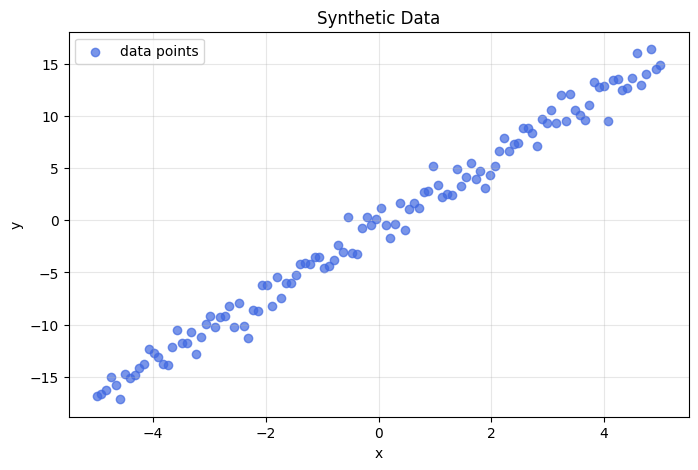

In [5]:
def generate_synthetic_data(m, true_w, true_b, noise_std):
    """Generate y = true_w * x + true_b + noise."""
    x = []
    y = []
    for i in range(m):
        xi = -5 + (10 / (m - 1)) * i  # linspace equivalent
        noise = random.gauss(0, noise_std)
        yi = true_w * xi + true_b + noise
        x.append(xi)
        y.append(yi)
    return x, y, true_w, true_b

# Generate synthetic data
x, y, true_w, true_b = generate_synthetic_data(m=120, true_w=3.2, true_b=-0.7, noise_std=1.2)
print(f"Generated {len(x)} data points")
print(f"True parameters: w={true_w:.3f}, b={true_b:.3f}")

# Visualize the data
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="royalblue", alpha=0.7, label="data points")
plt.title("Synthetic Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Step 2: Implement the Cost Function

The cost function $J(w,b)$ measures how well our parameters fit the data using Mean Squared Error (MSE).

In [6]:
def compute_cost(x, y, w, b):
    """Compute MSE cost J(w,b) = (1/(2m)) * sum((w*x_i + b - y_i)^2)"""
    m = len(x)
    total_error_sq = 0.0
    for i in range(m):
        prediction = w * x[i] + b
        error = prediction - y[i]
        total_error_sq += error ** 2
    return total_error_sq / (2 * m)

# Test with initial parameters
initial_cost = compute_cost(x, y, w=0.0, b=0.0)
print(f"Initial cost (w=0, b=0): {initial_cost:.4f}")

Initial cost (w=0, b=0): 44.9706


## Step 3: Implement Gradient Computation

We need to compute the partial derivatives (gradients) of the cost function with respect to $w$ and $b$.

In [7]:
def compute_gradients(x, y, w, b):
    """Compute dw and db: dw = (1/m) * sum((w*x_i + b - y_i) * x_i), db = (1/m) * sum(w*x_i + b - y_i)"""
    m = len(x)
    dw = 0.0
    db = 0.0
    for i in range(m):
        prediction = w * x[i] + b
        error = prediction - y[i]
        dw += error * x[i]
        db += error
    dw /= m
    db /= m
    return dw, db

# Test gradient computation
dw, db = compute_gradients(x, y, w=0.0, b=0.0)
print(f"Initial gradients: dw={dw:.4f}, db={db:.4f}")

Initial gradients: dw=-27.3658, db=0.6283


## Step 4: Implement Gradient Descent

Now we'll implement the gradient descent algorithm to iteratively update our parameters and minimize the cost function.

In [8]:
def gradient_descent(x, y, alpha, iterations):
    """Run gradient descent to find w and b."""
    w = 0.0
    b = 0.0
    cost_history = []
    for it in range(iterations):
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
        dw, db = compute_gradients(x, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        # Early stopping if cost change is tiny
        if it > 0 and abs(cost_history[-2] - cost) < 1e-12:
            break
    return w, b, cost_history

# Run gradient descent
alpha = 0.01  # Learning rate
iterations = 1500
w, b, cost_history = gradient_descent(x, y, alpha, iterations)

print(f"Learned parameters: w={w:.3f}, b={b:.3f}")
print(f"Final cost: {cost_history[-1]:.4f} (after {len(cost_history)} iterations)")
print(f"\nComparison:")
print(f"  True:    w={true_w:.3f}, b={true_b:.3f}")
print(f"  Learned: w={w:.3f}, b={b:.3f}")

Learned parameters: w=3.230, b=-0.628
Final cost: 0.5827 (after 1102 iterations)

Comparison:
  True:    w=3.200, b=-0.700
  Learned: w=3.230, b=-0.628


## Step 5: Visualize the Results

Let's visualize both the fitted line and how the cost decreased over iterations.

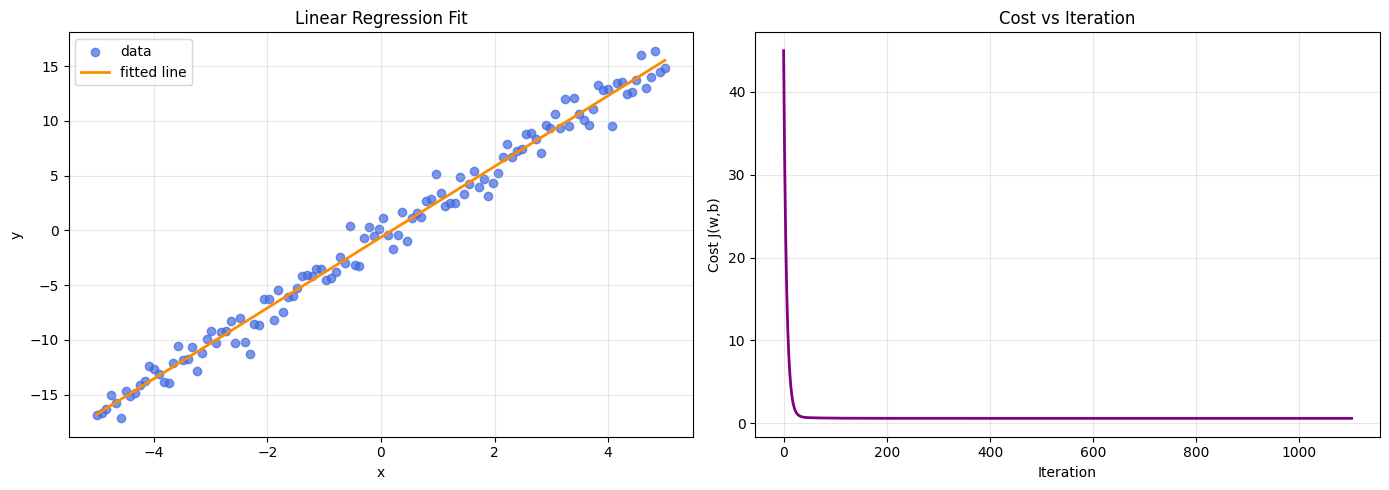

In [9]:
def predict(x, w, b):
    """Predict y for given x: y = w * x + b"""
    predictions = []
    for xi in x:
        predictions.append(w * xi + b)
    return predictions

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Data with fitted line
ax1.scatter(x, y, color="royalblue", alpha=0.7, label="data")
x_line = []
x_min = min(x)
x_max = max(x)
for i in range(200):
    xi = x_min + (x_max - x_min) / 199 * i
    x_line.append(xi)
y_line = predict(x_line, w, b)
ax1.plot(x_line, y_line, color="darkorange", linewidth=2, label="fitted line")
ax1.set_title("Linear Regression Fit")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Cost history
ax2.plot(cost_history, color="purple", linewidth=2)
ax2.set_title("Cost vs Iteration")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Cost J(w,b)")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Make Predictions

Now we can use our learned model to make predictions on new data points.

In [10]:
# Make predictions on example points
example_x = [0.0, 2.0, -3.0]
preds = predict(example_x, w, b)

print("Predictions using learned model:")
for xv, yv in zip(example_x, preds):
    print(f"  f({xv: .1f}) = {yv: .3f}")

Predictions using learned model:
  f( 0.0) = -0.628
  f( 2.0) =  5.831
  f(-3.0) = -10.317


## Exercises for Students

Try modifying the parameters and see how they affect the results:

1. **Learning rate experiments**: Try different values of `alpha` (e.g., 0.001, 0.1, 0.5). What happens?
2. **Noise level**: Change `noise_std` in the data generation. How does it affect the fit?
3. **Data size**: Try generating different numbers of data points (e.g., 30, 500). How does this affect convergence?
4. **True parameters**: Generate data with different true values of `true_w` and `true_b`. Does the algorithm still converge?
5. **Early stopping**: Observe when the cost stops changing significantly. Could we stop earlier?

### Challenge
Extend this implementation to handle multiple features (multivariate linear regression)!

## Optional: Save Plots to Files

If you want to save the plots as image files, you can use the code below:

In [ ]:
def save_plots(x, y, w, b, cost_history, out_dir):
    os.makedirs(out_dir, exist_ok=True)

    # Plot data + fitted line
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, color="royalblue", alpha=0.7, label="data")
    x_line = []
    x_min = min(x)
    x_max = max(x)
    for i in range(200):
        xi = x_min + (x_max - x_min) / 199 * i
        x_line.append(xi)
    y_line = predict(x_line, w, b)
    plt.plot(x_line, y_line, color="darkorange", label="fitted line")
    plt.title("Linear Regression Fit")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.tight_layout()
    fit_path = os.path.join(out_dir, "data_scatter_fit.png")
    plt.savefig(fit_path, dpi=120)
    plt.close()

    # Plot cost history
    plt.figure(figsize=(6,4))
    plt.plot(cost_history, color="purple")
    plt.title("Cost vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Cost J(w,b)")
    plt.tight_layout()
    cost_path = os.path.join(out_dir, "cost_history.png")
    plt.savefig(cost_path, dpi=120)
    plt.close()

    print(f"Saved plots:\n  {fit_path}\n  {cost_path}")

# Uncomment the line below to save plots
# save_plots(x, y, w, b, cost_history, "../outputs")

Saved plots:
  ../outputs/data_scatter_fit.png
  ../outputs/cost_history.png
